# Assurance of Learning (Number 1)

## Import Library

In [28]:
# Library Import

import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from scipy.interpolate import make_interp_spline

## Data

In [29]:
# Bag production data

data = [
    1863, 1614, 2570, 1685, 2101, 1811, 2457, 2171, 2134, 2502, 2358, 2399, 2048, 2523, 2086, 2391,
    2150, 2340, 3129, 2277, 2964, 2997, 2747, 2862, 3405, 2677, 2749, 2755, 2963, 3161, 3623, 2768,
    3141, 3439, 3601, 3531, 3477, 3376, 4027, 3175, 3274, 3334, 3964, 3649, 3502, 3688, 3657, 4422,
    4197, 4441, 4736, 4521, 4485, 4644, 5036, 4876, 4789, 4544, 4975, 5211, 4880, 4933, 5079, 5339,
    5232, 5520, 5714, 5260, 6110, 5334, 5988, 6235, 6365, 6266, 6345, 6118, 6497, 6278, 6638, 6590,
    6271, 7246, 6584, 6594, 7092, 7326, 7409, 7976, 7959, 8012, 8195, 8008, 8313, 7791, 8368, 8933,
    8756, 8613, 8705, 9098, 8769, 9544, 9050, 9186, 10012, 9685, 9966, 10048, 10244, 10740, 10318,
    10393, 10986, 10635, 10731, 11749, 11849, 12123, 12274, 11666, 11960, 12629, 12915, 13051,
    13387, 13309, 13732, 13162, 13644, 13808, 14101, 13992, 15191, 15018, 14917, 15046, 15556,
    15893, 16388, 16782, 16716, 17033, 16896, 17689
]

# From Month 1 to Month 144
months = np.arange(1, 145)

## Linear Approach
##### Just additional
I want to show why linear approach is bad and even if the linear approach is easy to code it's prohibited to use to solve this question

Graph using Linear Approach


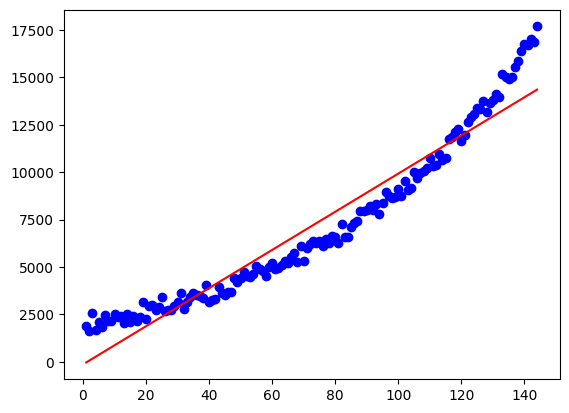

Mathematical Model (Linear Equation Model): y = 100.68 * x -141.04

Predicted value using Linear Equation Model:
Month 1: -40.36
Month 2: 60.32
Month 3: 160.99
Month 4: 261.67
Month 5: 362.34
Month 6: 463.02
Month 7: 563.69
Month 8: 664.37
Month 9: 765.05
Month 10: 865.72
Month 11: 966.40
Month 12: 1067.07
Month 13: 1167.75
Month 14: 1268.42
Month 15: 1369.10
Month 16: 1469.78
Month 17: 1570.45
Month 18: 1671.13
Month 19: 1771.80
Month 20: 1872.48
Month 21: 1973.15
Month 22: 2073.83
Month 23: 2174.51
Month 24: 2275.18
Month 25: 2375.86
Month 26: 2476.53
Month 27: 2577.21
Month 28: 2677.88
Month 29: 2778.56
Month 30: 2879.23
Month 31: 2979.91
Month 32: 3080.59
Month 33: 3181.26
Month 34: 3281.94
Month 35: 3382.61
Month 36: 3483.29
Month 37: 3583.96
Month 38: 3684.64
Month 39: 3785.32
Month 40: 3885.99
Month 41: 3986.67
Month 42: 4087.34
Month 43: 4188.02
Month 44: 4288.69
Month 45: 4389.37
Month 46: 4490.05
Month 47: 4590.72
Month 48: 4691.40
Month 49: 4792.07
Month 50: 4892.75
Month 51

In [30]:
x = np.array(months)
y = np.array(data)

# Step 1

# np.stack --> creating vertical stack
# np.ones --> creating an array with value = 1
# .T --> Transpose

A = np.vstack([x, np.ones(len(x))]).T

# print (A)

# Step 2

# np.newaxis --> reating new axis

y = y[:,np.newaxis]

# print (y)

# Step 3

# np.dot --> do the product rule matrix
# np.linalg.inv --> to invers a matrix

beta = np.dot(np.dot(np.linalg.inv(np.dot(A.T, A)), A.T), y)

# index 0 --> m, index 1 --> b

m = beta[0]
b = beta[1]

# Step 4

print (f'Graph using Linear Approach')

plt.plot (x, y, "bo")

plt.plot (x, m*x + b, "r")

plt.show()

print(f'Mathematical Model (Linear Equation Model): y = {m[0]:.2f} * x {b[0]:.2f}\n')

# Print each month with the production bag predicted by linear model

print (f'Predicted value using Linear Equation Model:')

for i in range(len(x)):
    month = x[i]
    production = m[0] * month + b[0]
    print(f'Month {month}: {production:.2f}')

### Linear Model Conclusion

It has been proven that a linear approach will produce poor approximation values ​​and even negative data.

## Polynomial Equation Model

Graph for the original data given based on the question



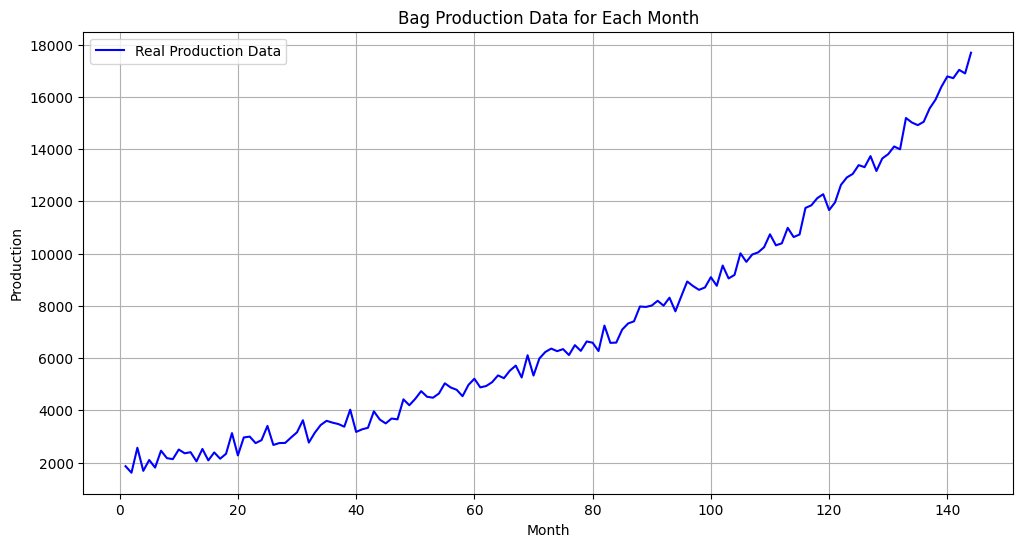

Graph using Polynomial Equation Degree 5



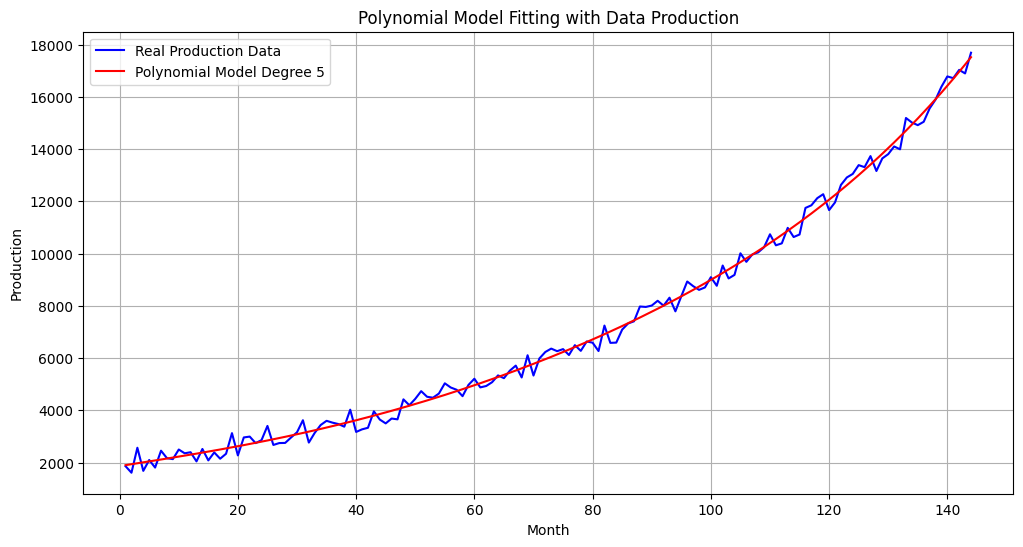

Polynomial Model Coefficient:

           5             4            3            2
2.515e-07 x - 6.251e-05 x + 0.007325 x - 0.001457 x + 35.52 x + 1869
Coefficient of x^5: 0.0000002515
Coefficient of x^4: -0.0000625150
Coefficient of x^3: 0.0073252801
Coefficient of x^2: -0.0014574290
Coefficient of x^1: 35.5201677705
Coefficient of x^0: 1868.5382788214

Polynomial Equation: 0.0000002515x^5 + -0.0000625150x^4 + 0.0073252801x^3 + -0.0014574290x^2 + 35.5201677705x^1 + 1868.5382788214x^0


In [31]:
# Plot the original data

print (f'Graph for the original data given based on the question\n')

plt.figure(figsize=(12, 6))
plt.plot(months, data, label='Real Production Data', color='blue')
plt.xlabel('Month')
plt.ylabel('Production')
plt.title('Bag Production Data for Each Month')
plt.legend()
plt.grid(True)
plt.show()

# Fit the polynomial equation using 5 Degree

degree = 5
poly_coeffs = np.polyfit(months, data, degree)
poly_model = np.poly1d(poly_coeffs)

fitted_data = poly_model(months)

# Plot the result of the polynomial equation model

print (f'Graph using Polynomial Equation Degree {degree}\n')

plt.figure(figsize=(12, 6))
plt.plot(months, data, label='Real Production Data', color='blue')
plt.plot(months, fitted_data, label=f'Polynomial Model Degree {degree}', color='red')
plt.xlabel('Month')
plt.ylabel('Production')
plt.title('Polynomial Model Fitting with Data Production')
plt.legend()
plt.grid(True)
plt.show()

# Print the polynomial coefficient model

print('Polynomial Model Coefficient:\n')
print (poly_model)

for i, coeff in enumerate(poly_coeffs):
    print(f'Coefficient of x^{degree-i}: {coeff:.10f}')

# Print the Polynomial Model Equation as a String
poly_equation = " + ".join([f"{coeff:.10f}x^{degree-i}" for i, coeff in enumerate(poly_coeffs)])
print(f"\nPolynomial Equation: {poly_equation}")

### Difference checking between the True vs Predicted Value using Polynomial Degree 5

In [32]:
def check_polynomial_accuracy(poly_model, x_values, y_actual):
    y_predicted = poly_model(x_values)
    total_diff = 0
    for x, y_pred, y_act in zip(x_values, y_predicted, y_actual):
        total_diff += abs(y_pred - y_act)
        print(f'x = {x}, y_predicted = {y_pred:.2f}, y_true = {y_act}, difference = {abs(y_pred - y_act):.2f}')
    return total_diff

# Checking the accuracy model from the difference and total difference of True vs Predicted Value

total_diff = check_polynomial_accuracy(poly_model, months, data)
print(f'Total difference: {total_diff:.2f}')

x = 1, y_predicted = 1904.06, y_true = 1863, difference = 41.06
x = 2, y_predicted = 1939.63, y_true = 1614, difference = 325.63
x = 3, y_predicted = 1975.28, y_true = 2570, difference = 594.72
x = 4, y_predicted = 2011.05, y_true = 1685, difference = 326.05
x = 5, y_predicted = 2046.98, y_true = 2101, difference = 54.02
x = 6, y_predicted = 2083.11, y_true = 1811, difference = 272.11
x = 7, y_predicted = 2119.47, y_true = 2457, difference = 337.53
x = 8, y_predicted = 2156.11, y_true = 2171, difference = 14.89
x = 9, y_predicted = 2193.05, y_true = 2134, difference = 59.05
x = 10, y_predicted = 2230.32, y_true = 2502, difference = 271.68
x = 11, y_predicted = 2267.96, y_true = 2358, difference = 90.04
x = 12, y_predicted = 2305.99, y_true = 2399, difference = 93.01
x = 13, y_predicted = 2344.46, y_true = 2048, difference = 296.46
x = 14, y_predicted = 2383.37, y_true = 2523, difference = 139.63
x = 15, y_predicted = 2422.76, y_true = 2086, difference = 336.76
x = 16, y_predicted = 246

### Evaluate the Polynomial Degree 5 Model

In [33]:
# Evaluate the model

print (f'Using the Polynomial Model\n')

fitted_data = poly_model(months)
mse = mean_squared_error(data, fitted_data)
print(f'Polynomial Degree: {degree}')
print(f'Mean Squared Error: {mse}')

Using the Polynomial Model

Polynomial Degree: 5
Mean Squared Error: 79412.21257840596


## Spline Model (Cubic Spline)

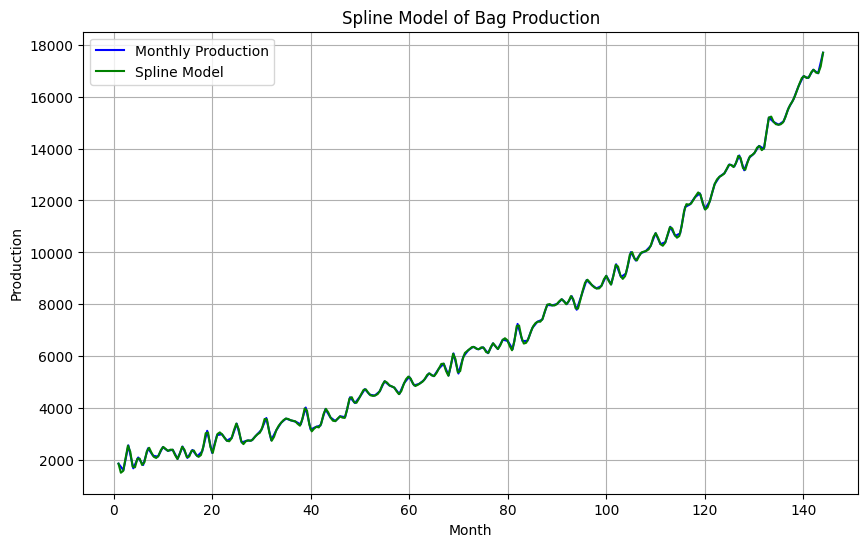

Spline Coefficients:
[ 1863.           989.26173866  2967.9726098   1367.16042833
  2309.06482024  1586.45065023  2660.23127839  2108.16167945
  2058.79864491  2611.04645107  2290.92264867  2507.41765692
  1856.57140982  2737.15388415  1904.50528529  2523.81440412
  2080.60828997  2192.53585608  3484.17657353  1934.40470274
  3125.39521     3025.22403724  2699.26056657  2755.21256335
  3665.46405335  2492.00311657  2798.51724726  2708.89339988
  2988.12235347  3066.3724793   3901.64277071  2507.77089641
  3195.73185083  3445.8379986   3641.24015756  3514.72105606
  3518.4335061   3190.67790735  4345.49904978  2952.32779394
  3340.53418659  3196.46708653  4152.66329422  3599.55314814
  3442.01781692  3764.33995036  3475.94248091  4636.00516418
  4084.02653399  4435.83563185  4828.95967488  4478.40631886
  4468.60241195  4589.97920944  5143.52233139  4836.88680221
  4843.15685535  4416.17206572  5011.81075036  5312.96343211
  4798.40865699  4936.58462594  5046.08358734  5418.91385002
  5

In [34]:
# Fitting Spline  Model

spline_model = make_interp_spline(months, data, k=2)  # Cubic spline

# Prediction using Spline Model

months_new = np.linspace(1, len(data), 300)
spline_predictions = spline_model(months_new)

# Plot the True Value and Predicted Value

plt.figure(figsize=(10, 6))
plt.plot(months, data, label='Monthly Production', color='blue')
plt.plot(months_new, spline_predictions, label='Spline Model', color='green')
plt.xlabel('Month')
plt.ylabel('Production')
plt.title('Spline Model of Bag Production')
plt.legend()
plt.grid(True)
plt.show()

# Print the Spline Coefficients

spline_coeffs = spline_model.c
print('Spline Coefficients:')
print(spline_coeffs)

### Difference checking between the True vs Predicted Value using Cubic Spline

In [35]:
def check_spline_accuracy(spline_model, x_values, y_actual):
    y_predicted = spline_model(x_values)
    total_diff = 0
    for x, y_pred, y_act in zip(x_values, y_predicted, y_actual):
        total_diff += abs(y_pred - y_act)
        print(f'Month {x:.0f}: y_predicted = {y_pred:.2f}, y_true = {y_act}, difference = {abs(y_pred - y_act):.2f}')
    return total_diff

# Checking the accuracy model from the difference and total difference of True vs Predicted Value

total_diff = check_spline_accuracy(spline_model, months, data)
print(f'Total difference: {total_diff:.2f}')

Month 1: y_predicted = 1863.00, y_true = 1863, difference = 0.00
Month 2: y_predicted = 1614.00, y_true = 1614, difference = 0.00
Month 3: y_predicted = 2570.00, y_true = 2570, difference = 0.00
Month 4: y_predicted = 1685.00, y_true = 1685, difference = 0.00
Month 5: y_predicted = 2101.00, y_true = 2101, difference = 0.00
Month 6: y_predicted = 1811.00, y_true = 1811, difference = 0.00
Month 7: y_predicted = 2457.00, y_true = 2457, difference = 0.00
Month 8: y_predicted = 2171.00, y_true = 2171, difference = 0.00
Month 9: y_predicted = 2134.00, y_true = 2134, difference = 0.00
Month 10: y_predicted = 2502.00, y_true = 2502, difference = 0.00
Month 11: y_predicted = 2358.00, y_true = 2358, difference = 0.00
Month 12: y_predicted = 2399.00, y_true = 2399, difference = 0.00
Month 13: y_predicted = 2048.00, y_true = 2048, difference = 0.00
Month 14: y_predicted = 2523.00, y_true = 2523, difference = 0.00
Month 15: y_predicted = 2086.00, y_true = 2086, difference = 0.00
Month 16: y_predict

### Evaluate the Spline Model (MSE)

In [36]:
# Spline Model Evaluation

spline_predictions_full = spline_model(months)
mse_spline = mean_squared_error(data, spline_predictions_full)
print(f'Mean Squared Error (Spline): {mse_spline}')

Mean Squared Error (Spline): 6.02075471897321e-25


### Comparison Between Polynomial and Spline Model

I'm testing between the two models to predict another value (variable x) if there is any fluctuation

In [37]:
# Predict Y Value when X Value is >= 145 using Polynomial and Spline Model

x_new = np.arange(145, 195)
poly_predictions_new = poly_model(x_new)
spline_predictions_new = spline_model(x_new)

# Print the prediction

print("Prediksi Menggunakan Model Polinomial:")
for i in range(len(x_new)):
    print(f"Month {x_new[i]}: {poly_predictions_new[i]:.2f}")

print("\nPrediksi Menggunakan Model Spline:")
for i in range(len(x_new)):
    print(f"Month {x_new[i]}: {spline_predictions_new[i]:.2f}")

Prediksi Menggunakan Model Polinomial:
Month 145: 17805.73
Month 146: 18099.39
Month 147: 18399.13
Month 148: 18705.09
Month 149: 19017.43
Month 150: 19336.29
Month 151: 19661.85
Month 152: 19994.25
Month 153: 20333.66
Month 154: 20680.25
Month 155: 21034.18
Month 156: 21395.63
Month 157: 21764.77
Month 158: 22141.78
Month 159: 22526.85
Month 160: 22920.16
Month 161: 23321.89
Month 162: 23732.25
Month 163: 24151.42
Month 164: 24579.60
Month 165: 25016.99
Month 166: 25463.81
Month 167: 25920.26
Month 168: 26386.55
Month 169: 26862.90
Month 170: 27349.52
Month 171: 27846.65
Month 172: 28354.50
Month 173: 28873.31
Month 174: 29403.32
Month 175: 29944.75
Month 176: 30497.86
Month 177: 31062.88
Month 178: 31640.07
Month 179: 32229.68
Month 180: 32831.97
Month 181: 33447.19
Month 182: 34075.61
Month 183: 34717.51
Month 184: 35373.15
Month 185: 36042.81
Month 186: 36726.77
Month 187: 37425.32
Month 188: 38138.74
Month 189: 38867.33
Month 190: 39611.38
Month 191: 40371.21
Month 192: 41147.10
M

### Testing Result

As you can see, there is a significant fluctuation if we are predict other X-value using Spline Model, so we ignore the Spline Model and we will using the Polynomial Equation Model

### Conclusion

We will use Polynomial Model Degree 5 with this details
<br><br>
Using the Polynomial Model
<br><br>
Polynomial Degree: 5
<br><br>
Mean Squared Error: 79412.21257840596
<br><br>
Polynomial Model Coefficient:
<br><br>
Coefficient of x^5: 0.0000002515
<br><br>
Coefficient of x^4: -0.0000625150
<br><br>
Coefficient of x^3: 0.0073252801
<br><br>
Coefficient of x^2: -0.0014574290
<br><br>
Coefficient of x^1: 35.5201677705
<br><br>
Coefficient of x^0: 1868.5382788214
<br><br><br>
Polynomial Equation: 0.0000002515x^5 + -0.0000625150x^4 + 0.0073252801x^3 + -0.0014574290x^2 + 35.5201677705x^1 + 1868.5382788214x^0